# Problem Statement
A Company wants to automate the loan eligibility process based on customer details provided while filling online application form. The details filled by the customer are Gender, Marital Status, Education, Number of Dependents, Income of self and co applicant, Required Loan Amount, Required Loan Term, Credit History and others. The requirements are as follows:
1. Check eligibility of the Customer given the inputs described above.(Classification)

# import modules

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sb

# fetch data

In [2]:
A = pd.read_csv("C:/Users/Nitin/Datasets/training_sets.csv")

In [3]:
A.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849.0,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,NaN,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000.0,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000.0,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
A.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             599 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          613 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    612 non-null    float64
 7   CoapplicantIncome  613 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(5), object(8)
memory usage: 62.5+ KB


In [5]:
A.shape

(614, 13)

# drop unnecessary columns

In [6]:
A.drop(labels=["Loan_ID"],axis=1,inplace=True)

# missing data traetment

In [7]:
A.isna().sum()

Gender               15
Married               3
Dependents           15
Education             1
Self_Employed        32
ApplicantIncome       2
CoapplicantIncome     1
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
from ANN_Modules import replacer

In [10]:
replacer(A)

In [11]:
A.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

# Exploratory Data Analysis


In [12]:
def Univariate(A, figsize,rows,columns):
    import seaborn as sns
    import matplotlib.pyplot as plt
    x = 1
    plt.figure(figsize=figsize)
    for i in A.columns:
        if A[i].dtypes == 'object':
            plt.subplot(rows,columns,x)
            sns.countplot(A[i])
            x = x + 1
        else:
            plt.subplot(rows,columns,x)
            sns.distplot(A[i])
            x = x+1

In [13]:
def Bivariate(A, Y,figsize,rows,columns):
    import seaborn as sns
    import matplotlib.pyplot as plt
    x = 1
    plt.figure(figsize=figsize)
    for i in A.columns:
        if A[i].dtypes == 'object':
            plt.subplot(rows,columns,x)
            sns.boxplot(A[i],A[Y])
            x = x + 1
        else:
            plt.subplot(rows,columns,x)
            sns.scatterplot(A[i],A[Y])
            x = x+1

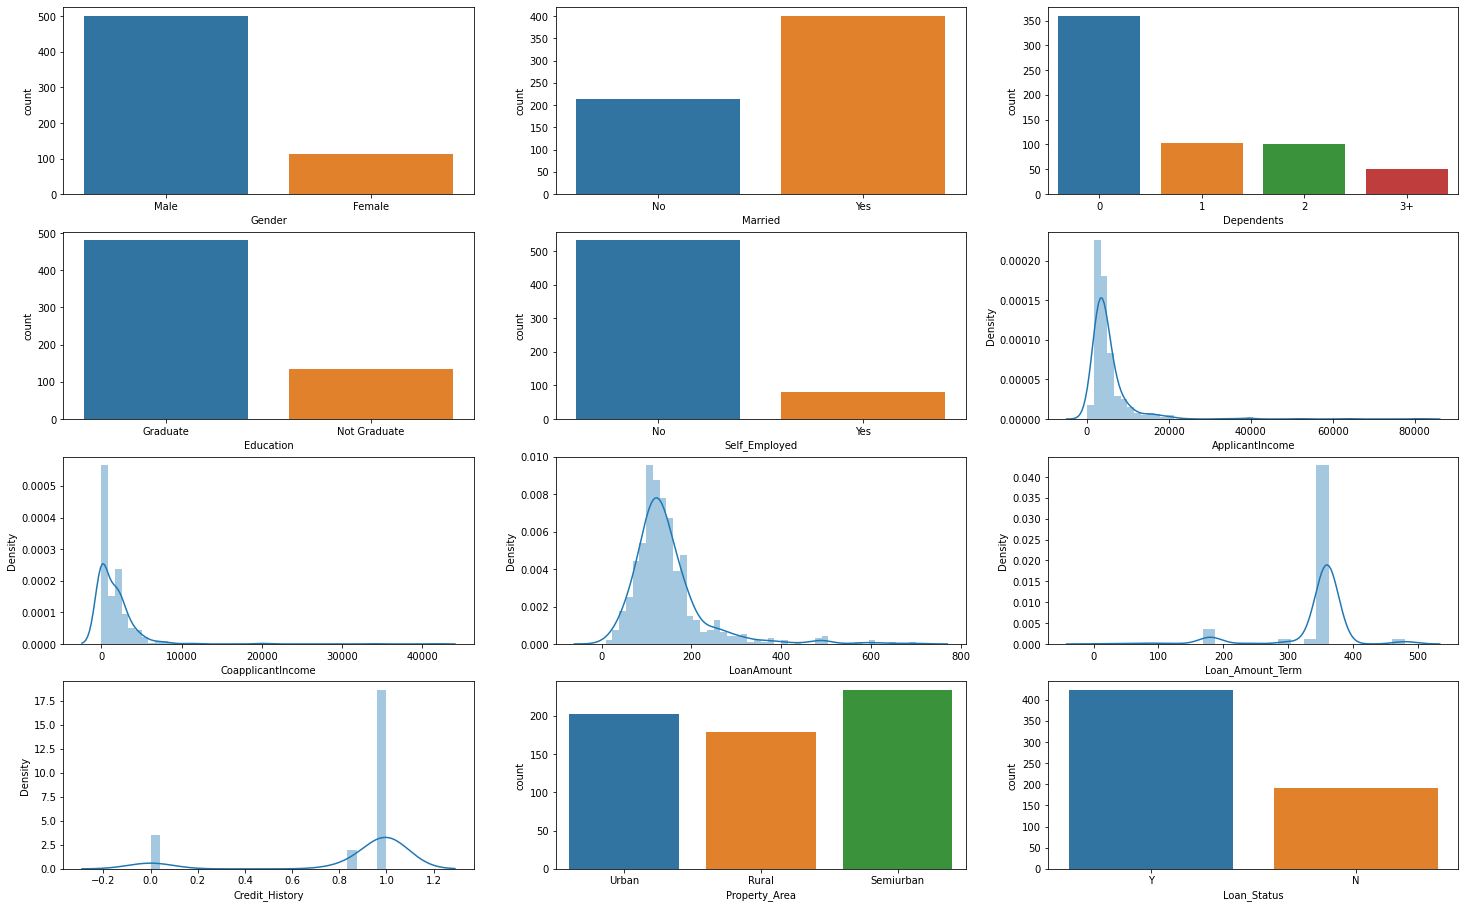

In [14]:
Univariate(A, (25,20),5,3)

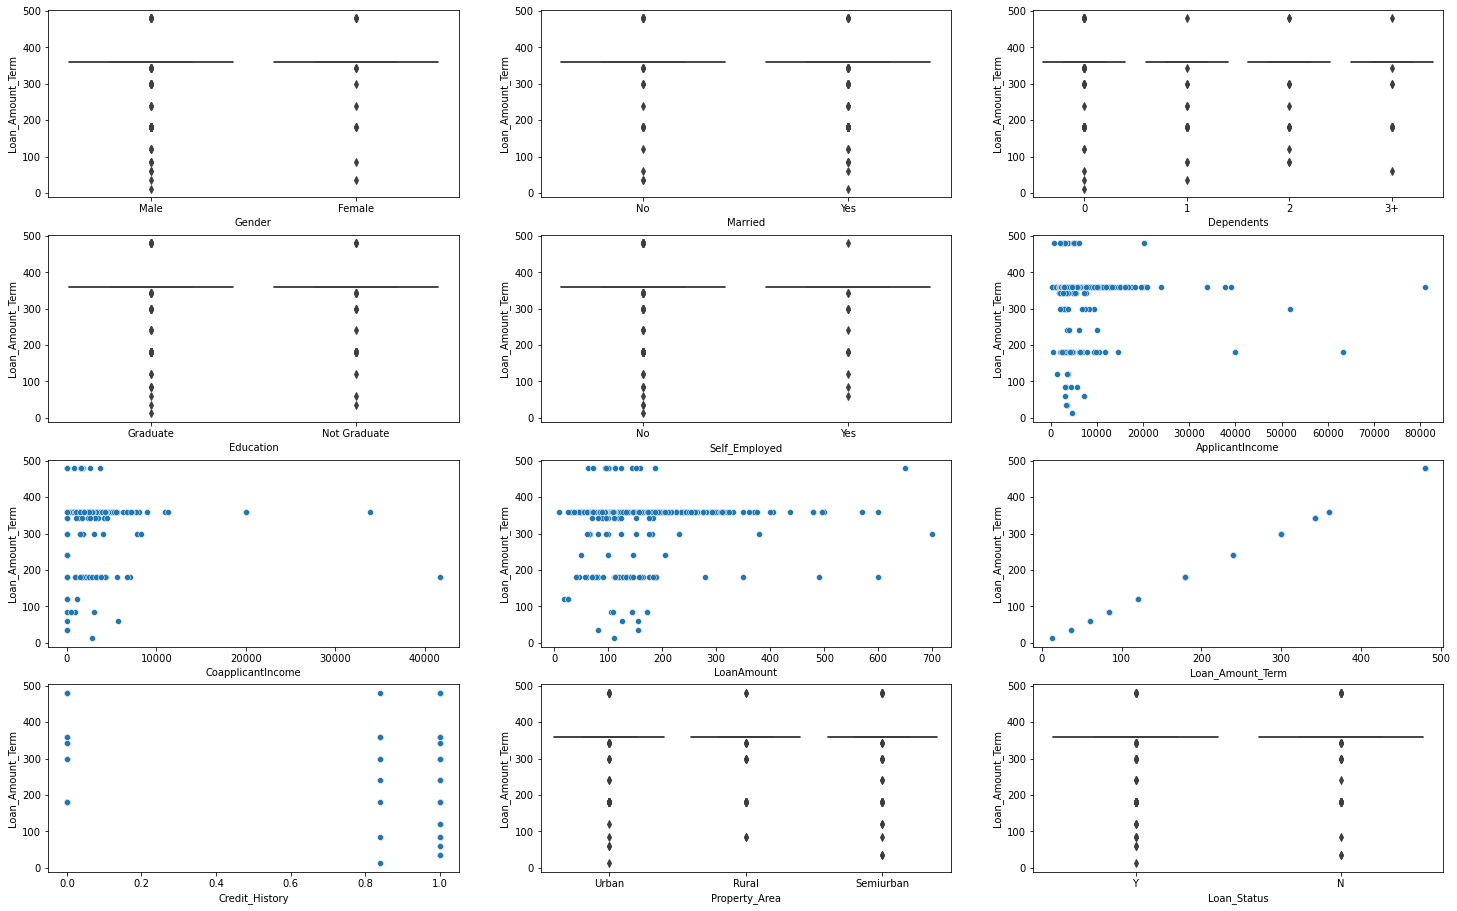

In [15]:
Bivariate(A,'Loan_Amount_Term', (25,20), 5,3)

# Defining Our Goal for prediction.

# X is our predictors.

# Y is Predicted Columns Loan Status

In [17]:
X = A.drop(['Loan_Status'],axis = 1)

In [18]:
Y = A[['Loan_Status']]

# Preprocessing --> Minmax Scaler Is used to standardized the values in the data.

# Also We are doing here One Hot Encoding to the data.

# At the end we will join the our continous preprocessed data and categorical One Hot Encoding data.

In [20]:
cat = []
con = []
for i in X.columns:
    if X[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)

In [21]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
X1 = pd.DataFrame(mm.fit_transform(X[con]),columns=con)

In [22]:
X2 = pd.get_dummies(X[cat])

In [23]:
X3 = X1.join(X2)

In [24]:
X3.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.070489,0.000000,0.198857,0.74359,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.065004,0.036192,0.172214,0.74359,1.0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0
2,0.035250,0.000000,0.082489,0.74359,1.0,0,1,0,1,1,0,0,0,1,0,0,1,0,0,1
3,0.030093,0.056592,0.160637,0.74359,1.0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,1
4,0.072356,0.000000,0.191027,0.74359,1.0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,1


# KNN K Nearest Neighbors

# We will see the accuracy of different Algorithms

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
model = knc.fit(X3, Y)

# Grid Search Cv --> It is used for finding any best parameters to also get the best accuracy. For that tuning parameter is helpful to reach our best params values.

In [34]:
tp = {'n_neighbors':range(1,40,1)}

In [35]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( knc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X3,Y)
gcv.best_params_

{'n_neighbors': 22}

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=15)
model = knc.fit(X3,Y)

# From here to get the best accuracy we will call that metrics. So it gives u the best accuracy when u pass the ur X variables(data).

In [38]:
from sklearn.metrics import accuracy_score
pred = model.predict(X3)

In [39]:
accuracy_score(Y, pred)

0.742671009771987

# Decision Tree with pruned parameter

In [41]:
tp = {'max_depth':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( dtc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X3,Y)
gcv.best_params_

{'max_depth': 1}

In [42]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21, max_depth=1)
#dtc = DecisionTreeClassifier(random_state=21, min_samples_split=2)
#dtc = DecisionTreeClassifier(random_state=21, min_samples_leaf=1)

model=dtc.fit(X3,Y)
predtr= model.predict(X3)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8094462540716613


# Ada Boost : It used with the Decision Tree max depth 2 and no. of tree n_estimator which we need to pass as a parameter.

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=21, max_depth=2)
#abc = AdaBoostClassifier(dtc, random_state=21,n_estimators=20)
abc = AdaBoostClassifier(dtc, random_state=21,n_estimators=1)

model=abc.fit(X3,Y)
predtr= model.predict(X3)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8159609120521173


In [46]:
tp = {'n_estimators':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( abc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X1,Y)
gcv.best_params_

{'n_estimators': 1}

# Random Forest With parameter maxdepth and n_estimators

In [47]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21)
tp = {'max_depth':range(1,40,1)}
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV( rfc, tp,scoring = 'accuracy', cv = 4)
gcv = cv.fit(X3,Y)
gcv.best_params_

{'max_depth': 3}

# Here i Got the different Accuracy from Different Algorithms or Technique.

# Now The conclusion is I am going to use Random Forest for Classification

# Random Forest Classification

In [48]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=21, max_depth = 3)

model=rfc.fit(X3,Y)
predtr= model.predict(X3)
print('train-Acc', accuracy_score(Y, predtr))

train-Acc 0.8127035830618893


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y, predtr)

array([[ 83, 109],
       [  6, 416]], dtype=int64)

# Testing

# Means while training the data our model is trained to predict next testing set.

# At that time i am going to test my model by using testing set.

In [50]:
B = pd.read_csv("C:/Users/Nitin/Datasets/testing_sets.csv")

In [51]:
B.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
xtest = B.drop(labels=["Loan_ID"],axis=1)

# In this We need to create a function for to check the feature|column is categorical and continous.

# Now inspection of missing data is very important steps to clean that data.

# Preprocessing of Test Data

# Here we are using our previously created Function replacer to replace the missing data.

In [53]:
replacer(xtest)

In [54]:
cat = []
con = []
for i in xtest.columns:
    if xtest[i].dtypes == 'object':
        cat.append(i)
    else:
        con.append(i)
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
Xcon = pd.DataFrame(mm.fit_transform(xtest[con]), columns = xtest[con].columns)
Xcat = pd.get_dummies(xtest[cat])
xtest = Xcon.join(Xcat)

In [55]:
xtest

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0.078865,0.000000,0.157088,0.746835,1.00,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
1,0.042411,0.062500,0.187739,0.746835,1.00,0,1,0,1,0,1,0,0,1,0,1,0,0,0,1
2,0.068938,0.075000,0.344828,0.746835,1.00,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
3,0.032263,0.106083,0.137931,0.746835,0.83,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1
4,0.045168,0.000000,0.095785,0.746835,1.00,0,1,1,0,1,0,0,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.055274,0.074042,0.162835,0.746835,1.00,0,1,0,1,0,0,0,1,0,1,0,1,0,0,1
363,0.057329,0.029542,0.166667,0.746835,1.00,0,1,0,1,1,0,0,0,1,0,1,0,0,0,1
364,0.044810,0.083042,0.187739,0.746835,0.83,0,1,1,0,1,0,0,0,1,0,1,0,0,1,0
365,0.068938,0.099708,0.249042,0.746835,1.00,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0


# That is the Testing Prediction which results as who is eligible for loan.

In [56]:
model.predict(xtest)

array(['Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'Y',
       'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y

In [57]:
B['Predict_Loan']= model.predict(xtest)

In [59]:
B

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Predict_Loan
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,Y
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,Y
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,Y
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban,Y
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban,Y
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban,Y
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban,Y
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural,Y
